<a href="https://colab.research.google.com/github/SwatiUtekar/ML-Project/blob/main/PCA_25_9_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
diabetes_dataset=pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes_dataset.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
print(diabetes_dataset['Glucose'])

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64


In [ ]:
# df=pd.DataFrame(diabetes_dataset['Glucose'],columns=diabetes_dataset['feature_names'])
diabetes_dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Train Test Split

In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome')
Y = diabetes_dataset['Outcome']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (537, 8) (231, 8)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(768,) (537,) (231,)


In [ ]:
# from sklearn.linear_model import LinearRegression
# Model=LinearRegression()
# Model.fit(X_train,Y_train)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(diabetes_dataset)

StandardScaler()

In [ ]:
scaled_data=scaler.transform(diabetes_dataset)

In [ ]:
scaled_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
X=pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(768, 9)

In [ ]:
X.shape

(768, 2)

In [ ]:
scaled_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [ ]:
X

array([[-1.75694707, -1.11174258],
       [ 1.50742148,  0.55940565],
       [-0.65082201, -1.92957633],
       ...,
       [ 0.57408846, -0.03381634],
       [ 0.17269908, -1.32289215],
       [ 1.32126715,  1.02748861]])

Text(0, 0.5, 'Second principle component')

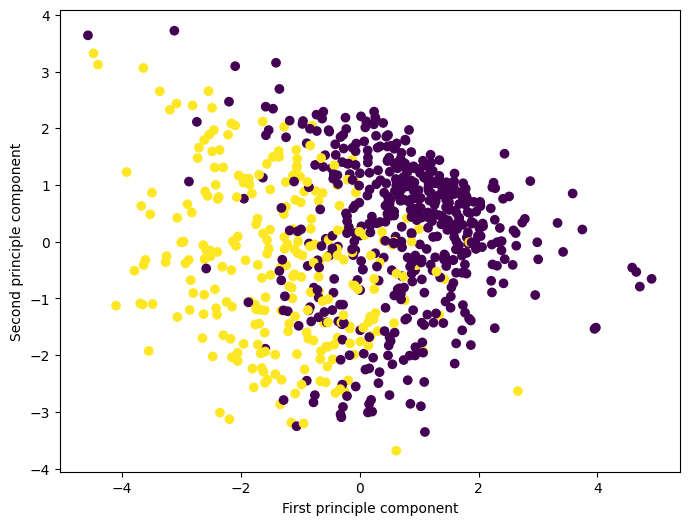

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=diabetes_dataset['Outcome'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')